# Imports

In [1]:
from collections import defaultdict

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.preprocessing import StandardScaler

from reader.reader import read_csv
from mcda.uta import Criterion
from mcda.report import calculate_heuristics
from methods.autoencoder import AutoencoderModel

# S2

# Read Data

In [2]:
df, CRITERIA = read_csv("data/s2.csv")
print(CRITERIA)
df.head()

[Criterion(name='g1', type=True, points=2), Criterion(name='g2', type=True, points=2), Criterion(name='g3', type=True, points=2), Criterion(name='g4', type=True, points=2), Criterion(name='g5', type=True, points=2)]


,g1,g2,g3,g4,g5
a01,-18342.0,-30.7,-37.2,2.33,3.00
a02,-15335.0,-30.2,-41.6,2.00,2.50
a03,-16973.0,-29.0,-34.9,2.66,2.50
a04,-15460.0,-30.4,-35.8,1.66,1.50
a05,-15131.0,-29.7,-35.6,1.66,1.75


# Preferences

In [3]:
PREFERENCES = []

# Calculations

In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

available_points = [2, 3, 4]
n_components = [2, 3, 4]

In [5]:
results_original = defaultdict(dict)
for points in available_points:
    print(f"points: {points}, method: original")
    criteria = [Criterion(name, points=points) for name in df.columns]
    f_nec, f_era, f_pwi, f_rai = calculate_heuristics(df, PREFERENCES, criteria)
    results_original["original"][(f"points: {points}", "f_nec")] = f_nec
    results_original["original"][(f"points: {points}", "f_era")] = f_era
    results_original["original"][(f"points: {points}", "f_pwi")] = f_pwi
    results_original["original"][(f"points: {points}", "f_rai")] = f_rai

points: 2, method: original
points: 3, method: original
points: 4, method: original


In [6]:
df_results_original = pd.DataFrame(results_original)
df_results_original

original
points: 2 f_nec   6.000000
          f_era  10.285714
          f_pwi   0.265247
          f_rai   2.876486
points: 3 f_nec   6.000000
          f_era  11.857143
          f_pwi   0.236423
          f_rai   2.755693
points: 4 f_nec   6.000000
          f_era  12.285714
          f_pwi   0.219843
          f_rai   2.685421

# One core

In [8]:
results = defaultdict(dict)
for points in available_points:
    for n in n_components:
        methods = {
            "PCA": PCA(n_components=n, random_state=42),
            "Autoencoder": AutoencoderModel(encoded_dim=n, epochs=300, batch_size=16),
            "KernelPCA": KernelPCA(n_components=n, random_state=42),
            "t-SNE": TSNE(n_components=n, perplexity=10, method="exact", random_state=42),
            "MDS": MDS(n_components=n, random_state=42),
            "Isomap": Isomap(n_components=n),
        }
        for method_name, method in methods.items():
            print(f"points: {points}, components: {n}, method: {method_name}")
            df_m = (
                pd.DataFrame(method.fit_transform(df_scaled), index=df.index, columns=range(n))
                .map(lambda x: f"{x:.4f}")
                .astype(np.float64)
            )
            criteria = [Criterion(name, points=points) for name in df_m.columns]
            f_nec, f_era, f_pwi, f_rai = calculate_heuristics(df_m, PREFERENCES, criteria)
            results[(method_name, f"dims: {n}")][(f"points: {points}", "f_nec")] = f_nec
            results[(method_name, f"dims: {n}")][(f"points: {points}", "f_era")] = f_era
            results[(method_name, f"dims: {n}")][(f"points: {points}", "f_pwi")] = f_pwi
            results[(method_name, f"dims: {n}")][(f"points: {points}", "f_rai")] = f_rai

points: 2, components: 2, method: PCA
points: 2, components: 2, method: Autoencoder
points: 2, components: 2, method: KernelPCA
points: 2, components: 2, method: t-SNE
points: 2, components: 2, method: MDS
points: 2, components: 2, method: Isomap
points: 2, components: 3, method: PCA
points: 2, components: 3, method: Autoencoder
points: 2, components: 3, method: KernelPCA
points: 2, components: 3, method: t-SNE
points: 2, components: 3, method: MDS
points: 2, components: 3, method: Isomap
points: 2, components: 4, method: PCA
points: 2, components: 4, method: Autoencoder
points: 2, components: 4, method: KernelPCA
points: 2, components: 4, method: t-SNE
points: 2, components: 4, method: MDS
points: 2, components: 4, method: Isomap
points: 3, components: 2, method: PCA
points: 3, components: 2, method: Autoencoder
points: 3, components: 2, method: KernelPCA
points: 3, components: 2, method: t-SNE
points: 3, components: 2, method: MDS
points: 3, components: 2, method: Isomap
points: 3, c

In [9]:
df_results = pd.DataFrame(results)
df_results = df_results.sort_index(axis=1, level=[0, 1])
df_results

Autoencoder                           Isomap             \
                    dims: 2    dims: 3    dims: 4    dims: 2    dims: 3   
points: 2 f_nec   53.000000   9.000000   3.000000  41.000000  20.000000   
          f_era    4.357143   9.571429  11.000000   5.785714   8.857143   
          f_pwi    0.162104   0.341898   0.380387   0.207353   0.282124   
          f_rai    2.023643   2.990507   3.205636   2.033436   2.824364   
points: 3 f_nec   53.000000   9.000000   3.000000  41.000000  20.000000   
          f_era    7.857143  12.071429  12.357143   8.500000  11.071429   
          f_pwi    0.141573   0.313417   0.353848   0.182800   0.256727   
          f_rai    2.081650   3.058636   3.220400   2.101729   2.763771   
points: 4 f_nec   53.000000   9.000000   3.000000  41.000000  20.000000   
          f_era    8.500000  12.285714  12.642857   9.428571  11.500000   
          f_pwi    0.131668   0.293651   0.334451   0.166974   0.246238   
          f_rai    2.023893   2.997979   3.167664   2.156300   2.727864   

                            KernelPCA                              MDS  \
                   dims: 4    dims: 2    dims: 3    dims: 4    dims: 2   
points: 2 f_nec  10.000000  48.000000  20.000000   9.000000  49.000000   
          f_era  10.285714   5.571429   8.642857  10.000000   5.357143   
          f_pwi   0.303775   0.187279   0.273253   0.274061   0.180113   
          f_rai   2.969714   2.173643   2.807786   2.925086   2.254600   
points: 3 f_nec  10.000000  48.000000  20.000000   9.000000  49.000000   
          f_era  12.071429   7.714286  10.785714  11.642857   7.928571   
          f_pwi   0.282293   0.164424   0.244259   0.242607   0.157665   
          f_rai   2.916286   2.131843   2.745364   2.833164   2.265079   
points: 4 f_nec  10.000000  48.000000  20.000000   9.000000  49.000000   
          f_era  12.142857   8.928571  11.428571  12.285714   8.857143   
          f_pwi   0.259010   0.151554   0.231903   0.222423   0.146988   
          f_rai   2.828207   2.160364   2.707029   2.753650   2.228371   

                                             PCA                        \
                   dims: 3    dims: 4    dims: 2    dims: 3    dims: 4   
points: 2 f_nec  23.000000  17.000000  43.000000  27.000000  20.000000   
          f_era   8.214286   9.214286   5.428571   7.500000   8.857143   
          f_pwi   0.247082   0.250685   0.202531   0.239147   0.262891   
          f_rai   2.721136   2.795921   2.075250   2.703600   2.868657   
points: 3 f_nec  23.000000  17.000000  43.000000  27.000000  20.000000   
          f_era  10.428571  11.285714   8.357143  10.285714  11.000000   
          f_pwi   0.222093   0.223394   0.172127   0.219799   0.238440   
          f_rai   2.680429   2.706871   2.082400   2.674007   2.812300   
points: 4 f_nec  23.000000  17.000000  43.000000  27.000000  20.000000   
          f_era  11.142857  11.428571   8.642857  10.500000  11.357143   
          f_pwi   0.205743   0.209247   0.161125   0.204328   0.224886   
          f_rai   2.624886   2.631807   2.044907   2.609457   2.757171   

                     t-SNE                        
                   dims: 2    dims: 3    dims: 4  
points: 2 f_nec  42.000000  23.000000   7.000000  
          f_era   5.642857   8.285714   9.642857  
          f_pwi   0.209341   0.269009   0.304791  
          f_rai   2.270214   2.691307   2.698471  
points: 3 f_nec  42.000000  23.000000   7.000000  
          f_era   8.142857  10.357143  11.857143  
          f_pwi   0.181062   0.249484   0.277470  
          f_rai   2.351857   2.750743   2.773271  
points: 4 f_nec  42.000000  23.000000   7.000000  
          f_era   9.214286  11.357143  12.142857  
          f_pwi   0.165272   0.230180   0.266428  
          f_rai   2.362500   2.693414   2.761543

# Parallel

In [ ]:
from concurrent.futures import ProcessPoolExecutor, as_completed


def process_point_method(points, n, method_name, method, df_scaled, df, PREFERENCES):
    df_m = (
        pd.DataFrame(method.fit_transform(df_scaled), index=df.index, columns=range(n))
        .map(lambda x: f"{x:.4f}")
        .astype(np.float64)
    )
    criteria = [Criterion(name, points=points) for name in df_m.columns]
    f_nec, f_era, f_pwi, f_rai = calculate_heuristics(df_m, PREFERENCES, criteria)

    return (
        method_name,
        n,
        points,
        {"f_nec": f_nec, "f_era": f_era, "f_pwi": f_pwi, "f_rai": f_rai},
    )


results = defaultdict(dict)


# Define the parallel execution using ProcessPoolExecutor
def run_parallel():
    with ProcessPoolExecutor() as executor:
        future_to_task = {
            executor.submit(
                process_point_method,
                points,
                n,
                method_name,
                method,
                df_scaled,
                df,
                PREFERENCES,
            ): (points, n, method_name)
            for points in available_points
            for n in n_components
            for method_name, method in {
                "PCA": PCA(n_components=n, random_state=42),
                "Autoencoder": AutoencoderModel(encoded_dim=n, epochs=300, batch_size=16),
                "KernelPCA": KernelPCA(n_components=n, random_state=42),
                "t-SNE": TSNE(n_components=n, perplexity=10, method="exact", random_state=42),
                "MDS": MDS(n_components=n, random_state=42),
                "Isomap": Isomap(n_components=n),
            }.items()
        }

        for future in as_completed(future_to_task):
            method_name, n, points, metrics = future.result()
            results[(method_name, f"dims: {n}")][(f"points: {points}", "f_nec")] = metrics["f_nec"]
            results[(method_name, f"dims: {n}")][(f"points: {points}", "f_era")] = metrics["f_era"]
            results[(method_name, f"dims: {n}")][(f"points: {points}", "f_pwi")] = metrics["f_pwi"]
            results[(method_name, f"dims: {n}")][(f"points: {points}", "f_rai")] = metrics["f_rai"]


run_parallel()

In [59]:
df_results = pd.DataFrame(results)
df_results = df_results.sort_index(axis=1, level=[0, 1])
df_results

Autoencoder                           Isomap             \
                    dims: 2    dims: 3    dims: 4    dims: 2    dims: 3   
points: 2 f_nec   53.000000   9.000000   3.000000  41.000000  20.000000   
          f_era    4.357143   9.571429  11.000000   5.785714   8.857143   
          f_pwi    0.162104   0.341898   0.380387   0.207353   0.282124   
          f_rai    2.023643   2.990507   3.205636   2.033436   2.824364   
points: 3 f_nec   53.000000   9.000000   3.000000  41.000000  20.000000   
          f_era    7.857143  12.071429  12.357143   8.500000  11.071429   
          f_pwi    0.141573   0.313417   0.353848   0.182800   0.256727   
          f_rai    2.081650   3.058636   3.220400   2.101729   2.763771   
points: 4 f_nec   53.000000   9.000000   3.000000  41.000000  20.000000   
          f_era    8.500000  12.285714  12.642857   9.428571  11.500000   
          f_pwi    0.131668   0.293651   0.334451   0.166974   0.246238   
          f_rai    2.023893   2.997979   3.167664   2.156300   2.727864   

                            KernelPCA                              MDS  \
                   dims: 4    dims: 2    dims: 3    dims: 4    dims: 2   
points: 2 f_nec  10.000000  48.000000  20.000000   9.000000  49.000000   
          f_era  10.285714   5.571429   8.642857  10.000000   5.357143   
          f_pwi   0.303775   0.187279   0.273253   0.274061   0.180113   
          f_rai   2.969714   2.173643   2.807786   2.925086   2.254600   
points: 3 f_nec  10.000000  48.000000  20.000000   9.000000  49.000000   
          f_era  12.071429   7.714286  10.785714  11.642857   7.928571   
          f_pwi   0.282293   0.164424   0.244259   0.242607   0.157665   
          f_rai   2.916286   2.131843   2.745364   2.833164   2.265079   
points: 4 f_nec  10.000000  48.000000  20.000000   9.000000  49.000000   
          f_era  12.142857   8.928571  11.428571  12.285714   8.857143   
          f_pwi   0.259010   0.151554   0.231903   0.222423   0.146988   
          f_rai   2.828207   2.160364   2.707029   2.753650   2.228371   

                                             PCA                        \
                   dims: 3    dims: 4    dims: 2    dims: 3    dims: 4   
points: 2 f_nec  23.000000  17.000000  43.000000  27.000000  20.000000   
          f_era   8.214286   9.214286   5.428571   7.500000   8.857143   
          f_pwi   0.247082   0.250685   0.202531   0.239147   0.262891   
          f_rai   2.721136   2.795921   2.075250   2.703600   2.868657   
points: 3 f_nec  23.000000  17.000000  43.000000  27.000000  20.000000   
          f_era  10.428571  11.285714   8.357143  10.285714  11.000000   
          f_pwi   0.222093   0.223394   0.172127   0.219799   0.238440   
          f_rai   2.680429   2.706871   2.082400   2.674007   2.812300   
points: 4 f_nec  23.000000  17.000000  43.000000  27.000000  20.000000   
          f_era  11.142857  11.428571   8.642857  10.500000  11.357143   
          f_pwi   0.205743   0.209247   0.161125   0.204328   0.224886   
          f_rai   2.624886   2.631807   2.044907   2.609457   2.757171   

                     t-SNE                        
                   dims: 2    dims: 3    dims: 4  
points: 2 f_nec  42.000000  23.000000   7.000000  
          f_era   5.642857   8.285714   9.642857  
          f_pwi   0.209341   0.269009   0.304791  
          f_rai   2.270214   2.691307   2.698471  
points: 3 f_nec  42.000000  23.000000   7.000000  
          f_era   8.142857  10.357143  11.857143  
          f_pwi   0.181062   0.249484   0.277470  
          f_rai   2.351857   2.750743   2.773271  
points: 4 f_nec  42.000000  23.000000   7.000000  
          f_era   9.214286  11.357143  12.142857  
          f_pwi   0.165272   0.230180   0.266428  
          f_rai   2.362500   2.693414   2.761543

In [60]:
df_results.columns = pd.MultiIndex.from_tuples(
    [(method, int(dim.split(": ")[1])) for method, dim in df_results.columns],
    names=["method", "dim"],
)
df_results.index = pd.MultiIndex.from_tuples([(int(p.split(": ")[1]), heu) for p, heu in df_results.index])

,method,dim,f_era
0,Autoencoder,2,4.357143
1,Autoencoder,3,9.571429
2,Autoencoder,4,11.000000
3,Isomap,2,5.785714
4,Isomap,3,8.857143
5,Isomap,4,10.285714
6,KernelPCA,2,5.571429
7,KernelPCA,3,8.642857
8,KernelPCA,4,10.000000
9,MDS,2,5.357143


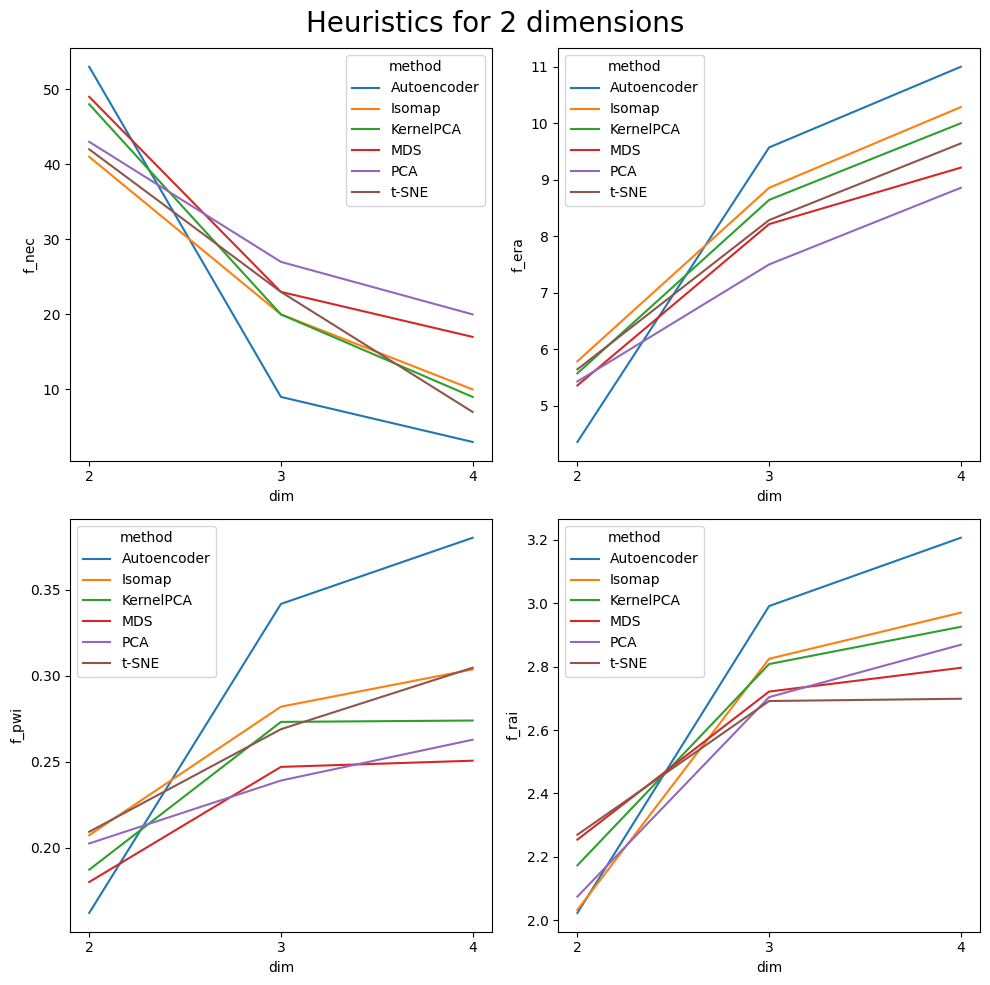

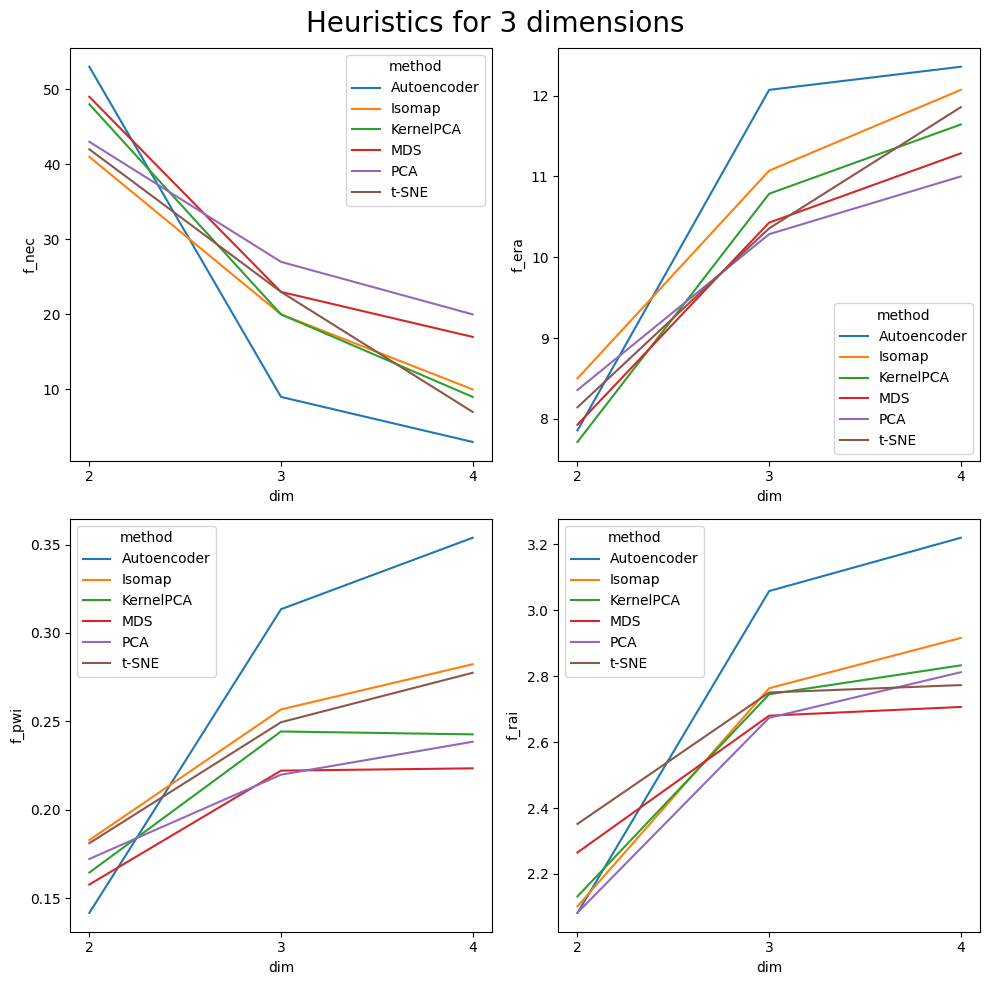

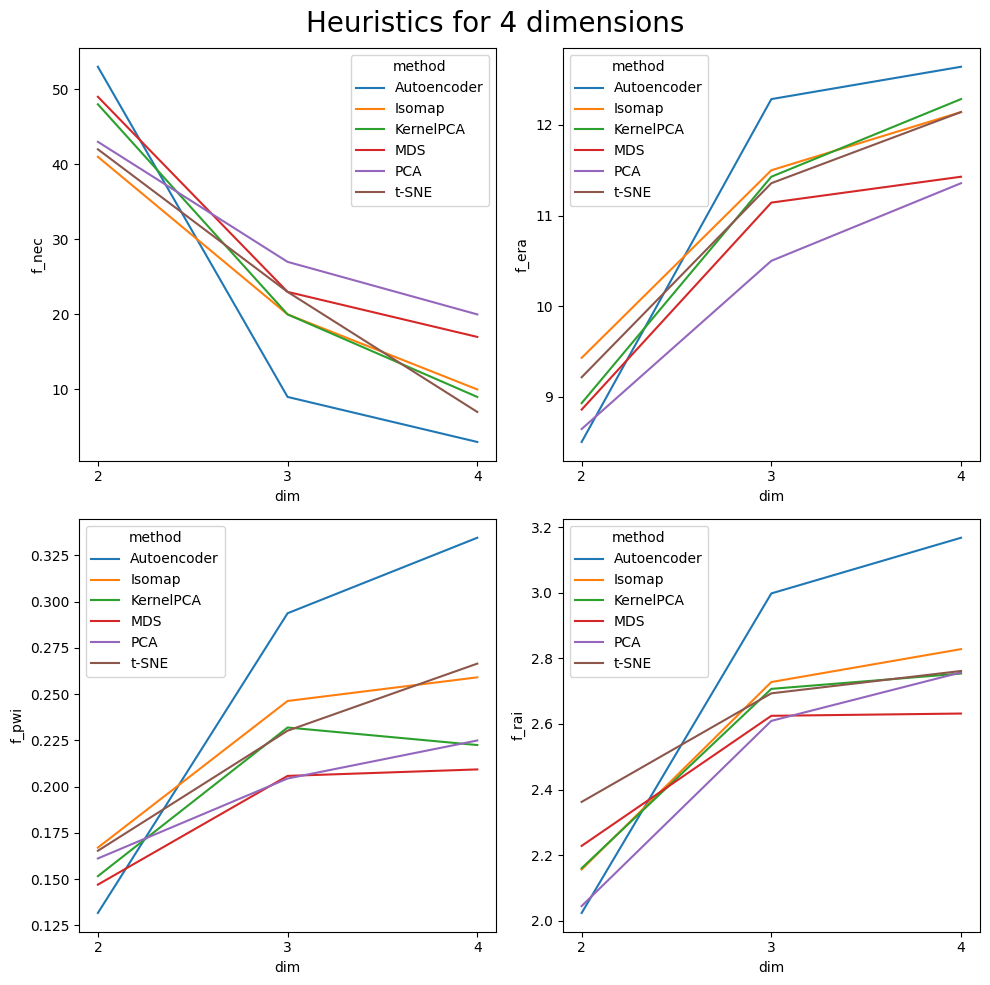

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_n_points = df_results.index.get_level_values(0).unique()
heuristics = df_results.index.get_level_values(1).unique()

for n_points in unique_n_points:
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.flatten()

    for i, heuristic in enumerate(heuristics):
        df_r = df_results.loc[n_points].loc[heuristic].reset_index()
        sns.lineplot(x="dim", y=heuristic, hue="method", data=df_r, ax=axes[i])
        axes[i].set_xticks(df_r["dim"].unique())

    plt.suptitle(f"Heuristics for {n_points} dimensions", fontsize=20)
    plt.tight_layout()
    plt.show()